
<img src="../../assets/logo3.png" width="200" height="200" >
<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>HandsOn 5 - Crawling the web with Beautiful Soup</b></font><br>
        <hr/>
</div>


<pre>
. 
├── <a href="#Task1">Task1: Football Table</a> (Morning session)
│
└── <a href="#Task2">Task2: Phone Shop</a> (Afternoon session)
</pre>


In [1]:
%config Completer.use_jedi = False

<hr />

## 💭💭💭Task 1: Football table💭💭💭

<a name="Task1"></a>

The goal of this exercise is to familiarize you more with Inspecting HTML source codes by extracting information from a static table in varzesh3.com.

💭 Please visit this <b>[link](https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401)</b> and look at the table. It's the data for Iran's football league (1400-1401).

💭 Run the code below to load the table.

<b><span style="color:red">When working with Persian letters, sometimes <b><span style="color:green">requests</span></b> can get the encoding wrong and show strange characters. If this happens, restart the kernel and run the code below again.</span></b>


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table 

💭 By inspecting the tag names in the webpage youre trying to crawl, give a short description of what each represent:

 - ```<thead>```: 
 - ```<tr>```:
 - ```<th>```:
 - ```<tbody>```:
 - ```<td>```:

<hr />

💭 Explain briefly what this code is doing. What should the missing value stand for?

....

In [21]:
rows = table.find_all('tr')
for row in rows:
    for head in row.find_all('th'):
        print([head.text])

['رتبه']
['']
['بازی']
['برد']
['مساوی']
['باخت']
[' گل -/+']
['تفاضل ']
['امتياز']
['5 بازی آخر   ']


<hr />

💭 Explain briefly what this code is doing. 

...

In [ ]:
for row in rows:        
    for body in row.find_all('td'):
        print([body.text])

<hr />

📖 As you see, some of the lines have extra spacings, or extra characters like "\n", "\r" or extra spaces. We can use ```replace('a', 'b')``` function on any string to deal with these. 

💭 Use the aforementioned function to remove these extra characters from the table in the code below.

In [23]:
rows = table.find_all('tr')

datas = []

for row in rows:
    data = []
    for head in row.find_all('th')[:10]:
        h = head.text
        
        ''' Enter your code here'''
        h = h.replace('\n', '').replace('\r', '').replace(' ', '')
        
        data.append(h)
    for body in row.find_all('td')[:10]:
        b = body.text
        
        ''' Enter your code here'''
        b = b.replace('\n', '').replace('\r', '').replace(' ', '')
        
        data.append(b)
    datas.append(data)

datas

[['رتبه',
  '',
  'بازی',
  'برد',
  'مساوی',
  'باخت',
  'گل-/+',
  'تفاضل',
  'امتياز',
  '5بازیآخر'],
 ['1', 'استقلال', '30', '19', '11', '0', '39-10', '29', '68', '✔✔―✔―'],
 ['2', 'پرسپولیس', '30', '18', '9', '3', '44-21', '23', '63', '✔―✖✔✔'],
 ['3', 'سپاهان', '30', '16', '8', '6', '43-21', '22', '56', '✔✔✔✖―'],
 ['4', 'گلگهرسیرجان', '30', '13', '12', '5', '37-28', '9', '51', '✔✔✔✔✔'],
 ['5', 'فولاد', '30', '13', '10', '7', '30-22', '8', '49', '✔✖✔✔―'],
 ['6', 'مسرفسنجان', '30', '12', '9', '9', '39-29', '10', '45', '✔✖✔✖―'],
 ['7', 'ذوبآهن', '30', '10', '7', '13', '21-25', '-4', '37', '――✔―✖'],
 ['8', 'آلومینیوماراک', '30', '7', '16', '7', '20-23', '-3', '37', '✖✔―――'],
 ['9', 'پیکان', '30', '7', '15', '8', '26-27', '-1', '36', '✖―✖――'],
 ['10', 'صنعتنفتآبادان', '30', '9', '9', '12', '26-30', '-4', '36', '―✖✖✖―'],
 ['11', 'هوادار', '30', '8', '10', '12', '18-25', '-7', '34', '✔✖✔✖✖'],
 ['12', 'نساجیمازندران', '30', '6', '15', '9', '24-34', '-10', '33', '―✖―✔―'],
 ['13', 'تراکتور',

<hr />

💭 Convert ```datas``` to a pandas DataFrame with proper column names & no empty rows or columns and all numbers as integers. Also change "✔" to +1, "✖" to -1, and "-" to 0. For example, "✔✖✔✖―" should become \[1, -1, 1, -1, 0\]

In [24]:
import pandas as pd

''' Enter your code here'''
df = pd.DataFrame(datas[1:], columns=datas[0], index=[i for i in range(1,len(datas[1:])+1)])
df

,رتبه,,بازی,برد,مساوی,باخت,گل-/+,تفاضل,امتياز,5بازیآخر
1,1,استقلال,30,19,11,0,39-10,29,68,✔✔―✔―
2,2,پرسپولیس,30,18,9,3,44-21,23,63,✔―✖✔✔
3,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―
4,4,گلگهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔
5,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―
6,6,مسرفسنجان,30,12,9,9,39-29,10,45,✔✖✔✖―
7,7,ذوبآهن,30,10,7,13,21-25,-4,37,――✔―✖
8,8,آلومینیوماراک,30,7,16,7,20-23,-3,37,✖✔―――
9,9,پیکان,30,7,15,8,26-27,-1,36,✖―✖――
10,10,صنعتنفتآبادان,30,9,9,12,26-30,-4,36,―✖✖✖―


<hr />

💭 Run these 2 code blocks

In [ ]:
df.head()

In [ ]:
df.info()

<hr />

💭 Create Two Columns for GS (Goals Scored) and GA (Goals Against)

In [25]:
df[['G+', 'G-']] = df['گل-/+'].str.split('-', 1, expand=True)
df.head()

,رتبه,,بازی,برد,مساوی,باخت,گل-/+,تفاضل,امتياز,5بازیآخر,G+,G-
1,1,استقلال,30,19,11,0,39-10,29,68,✔✔―✔―,39,10
2,2,پرسپولیس,30,18,9,3,44-21,23,63,✔―✖✔✔,44,21
3,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―,43,21
4,4,گلگهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔,37,28
5,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―,30,22


<hr />

💭 Which team has most losses?

In [26]:
df.iloc[df['باخت'].astype('int').argmax(),:]

رتبه                  15
            شهرخودرومشهد
بازی                  30
برد                    2
مساوی                 11
باخت                  17
گل-/+              17-43
تفاضل                -26
امتياز                17
5بازیآخر           ✖―✖✖―
G+                    17
G-                    43
Name: 15, dtype: object

<hr />


💭 Which team has most goal difference? (Difference between the +Goals and -Goals) 

In [27]:
df['تفاضل'] = df['G+'].astype('int') - df['G-'].astype('int')
df.iloc[df['تفاضل'].argmax(),:]

رتبه              1
            استقلال
بازی             30
برد              19
مساوی            11
باخت              0
گل-/+         39-10
تفاضل            29
امتياز           68
5بازیآخر      ✔✔―✔―
G+               39
G-               10
Name: 1, dtype: object

<hr />


💭 which team was the best during last 3 games

In [28]:
df['last3'] = df['5بازیآخر'].apply(lambda x: x[-3:].count('✔') * 3 + x[-3:].count('―') * 1)
df.iloc[df['last3'].argmax(),:]

رتبه                  4
            گلگهرسیرجان
بازی                 30
برد                  13
مساوی                12
باخت                  5
گل-/+             37-28
تفاضل                 9
امتياز               51
5بازیآخر          ✔✔✔✔✔
G+                   37
G-                   28
last3                 9
Name: 4, dtype: object

 <hr />
The code snippet below can be used to display Persian and Arabic strings beautifully when plotting in Python. 

- Please add the package ```arabic_reshaper``` by this command: ```!conda install -c conda-forge arabic_reshaper```
- Please add the package ```bidi``` by this command: ```!conda install -c conda-forge python-bidi```

In [ ]:
'''
You can install the packages here
'''

In [29]:
# The code 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
def reshaper(text_list):
    for i in range(len(text_list)):
        text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))
    return text_list

 💭 Plot Total Scores and The Scores of the last 3 games in one single bar plot. Please use the code snippet above for displaying the team names.
 (Your answer should look like the provided figure)


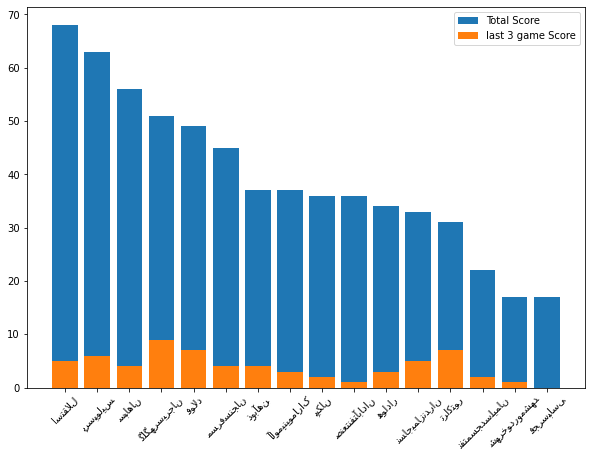

In [43]:
plt.figure(figsize=(10,7))
x_axis = reshaper(df[''].values)
plt.bar(x_axis, df['امتياز'].astype('int').values, label='Total Score')
plt.bar(x_axis, df['last3'].values, label='last 3 game Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />

## 💭💭💭Task 2: Phone Shop💭💭💭

<a name="Task2"></a>

📖 Now let's search for a nice new phone in <b>technolife</b> by crawling it. :) <br />
Below you can see the URL of the first page in the phone section <br />
https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page=1

<b>Notes</b>
- if we want to crawl laptops from all pages, we should change the URL accordingly (For example, ```page=1``` should change to ```page=2```.
In this example, we want to crawl the first 10 pages.
- Crawling 10 pages might take a while to finish, so begin with just a few pages and increase the number when you're sure about your code. Using ```tqdm``` library helps by showing a progress bar! install it with ```pip``` or ```conda``` before running the code below.


In [ ]:
'''
You can install tqdm here
'''


### 💭 Crawling and saving the info
💭 Open the URL above and Inspect the web page and their elements like title, price , ... to familiarize yourself with them.

<hr />
💭 Complete the crawling code below...



<b>Notes:</b> Please apply no preprocessing or data cleaning! <b>Just save the raw data</b>. You can also change the pages by manipulating the URL in the ```For``` loop below. Your results should look like the table provided in the output cell below.

In [31]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
from tqdm import tqdm

url = 'https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page='

result = []

for page in tqdm(range(1, 10)):
    
    '''' Enter your code here to Change the URL page '''
    new_url = url+str(page)
    
    page = requests.get(new_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Get product list
    products = soup.select('div#productsList>ul>li')
    for p in products:
        # Get product title
        title = p.select('a.ProductComp_product_title__bOrf5>strong')[0].text

        # Get product price
        price = -1

        offer_section = p.select_one('div.ProductComp_product_off_box__OfLBa')
        if not offer_section:
            # there is no offer for this product (main price)
            '''' Enter your code here to extract product main price '''
            main_price = p.select_one('section.ProductComp_product_price__S4_x8>div.ProductComp_main_price__XgWce')
            price = main_price.select('span')[0].text
        else:
            # there is offer for this product (offer price)
            '''' Enter your code here to extract product offer price '''
            offer_price = p.select_one('section.ProductComp_product_price__S4_x8>div.ProductComp_offer_price__HAQ6N')
            price = offer_price.select('span')[0].text
        
        # Get product specs (hard disk/screen size/camera/battery)
        '''' Enter your code here to extract product specs '''
        specs = p.select('div.ProductComp_product_icon__OLqA5>ul>li')
        hard_disk = specs[0].select('span')[1].text 
        size = specs[1].select('span')[1].text
        camera = specs[2].select('span')[1].text
        battery = specs[3].select('span')[1].text
        
        
        result.append({
            'title': title,
            'hard disk': hard_disk,
            'size': size,
            'camera': camera,
            'battery': battery,
            'price': price
        })

# Saving dictionary in a dataframe
data = pd.DataFrame(result)
data

100%|██████████| 9/9 [00:16<00:00,  1.80s/it]


,title,hard disk,size,camera,battery,price
0,گوشی موبايل سامسونگ مدل گلکسی A32 4G دو سیم کا...,128,6.4,64,5000,"6,199,000"
1,گوشی موبايل نوکيا مدل 105 (2019) ظرفیت 4 مگابا...,4,1.77,,800,"635,000"
2,گوشی موبایل سامسونگ مدل Galaxy A13 ظرفیت 64 ...,64,6.6,50,5000,"4,449,000"
3,گوشی موبايل سامسونگ مدل Galaxy A52s 5G ظرفیت 2...,256,6.5,64,4500,"11,899,000"
4,گوشی موبايل نوکيا مدل 106 (2018) ظرفیت 4 مگابا...,4,1.8,,800,"630,000"
...,...,...,...,...,...,...
283,گوشی موبایل شیائومی مدل 11T 5G - ظرفیت 256 گیگ...,256,6.67,108,5000,"11,115,000"
284,گوشی موبایل نوکیا G20 ظرفیت 128 گیگابایت - رم ...,128,6.52,48,5050,"4,355,000"
285,گوشی موبایل شیائومی Redmi Note 10S ظرفیت 128 گ...,64,128,6.43,5000,"5,559,000"
286,گوشی موبایل نوکیا 150 (2020),4,2.4,VGA,1020,"1,129,000"


<hr />

### 💭 Clean the pandas dataframe
<a name="Task2:clean"></a>

 - Fix data types
   - `hard disk` -> `int`
   - `size` -> `float`
   - `camera` -> `float`
   - `battery` -> `int`
   - `price` -> `int`
 - Normalize Arabic characters
 - Extract RAM inforamtion. (Use Regex)
 - Clean `title` column
   - Remove redundant words (e.g. گوشی)
   - Remove parts related to RAM/Storage information
   - Remove non-word characters (e.g. -)
 
 You can play around with your <b><span style="color:green">Regex</span></b> patterns <b>[here](https://regexr.com/)</b>

In [32]:
# Fix data types
data['hard disk'] = data['hard disk'].astype(int)
data['size'] = data['size'].astype(float)

data['camera'] = data['camera'].replace(['VGA', ''], 0)
data['camera'] = data['camera'].astype(float)

data['battery'] = data['battery'].astype(int)

data['price'] = [price.replace(',', '') for price in data['price']]
data['price'] = data['price'].astype(int)

In [33]:
# Normalize Arabic characters
def normalize_char(txt):
    txt = txt.replace('ك', 'ک')
    txt = txt.replace('دِ', 'د')
    txt = txt.replace('زِ', 'ز')
    txt = txt.replace('ذِ', 'ذ')
    txt = txt.replace('شِ', 'ش')
    txt = txt.replace('سِ', 'س')
    txt = txt.replace('ى', 'ی')
    txt = txt.replace('ي', 'ی')
    return txt

data['title'] = data['title'].apply(normalize_char)

In [34]:
# Extract RAM
import re 

def extract_ram(title):
    info = re.findall(r'رم (\d+) (مگابایت|گیگابایت)', title)
    if len(info)>0:
        if info[0][1] == 'مگابایت':
            return int(info[0][0])
        else:
            return int(info[0][0]) * 1024
    else:
        return 0

data['ram'] = data['title'].apply(extract_ram)

In [35]:
# Clean title
def clean(title):
    title = title.replace('گوشی', '')
    title = title.replace('موبایل', '')
    title = title.replace('مدل', '')
    title = re.sub(r'رم \d+ (مگابایت|گیگابایت)', '', title)
    title = re.sub(r'ظرفیت \d+ (مگابایت|گیگابایت)', '', title)
    title = re.sub(r'\W+', ' ', title)
    return title.strip()

data['title'] = data['title'].apply(clean)

<hr />

💭 Run these 2 code blocks at the end of your task

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      288 non-null    object 
 1   hard disk  288 non-null    int32  
 2   size       288 non-null    float64
 3   camera     288 non-null    float64
 4   battery    288 non-null    int32  
 5   price      288 non-null    int32  
 6   ram        288 non-null    int64  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 12.5+ KB


In [37]:
data

,title,hard disk,size,camera,battery,price,ram
0,سامسونگ گلکسی A32 4G دو سیم کارت,128,6.40,64.00,5000,6199000,6144
1,نوکیا 105 2019,4,1.77,0.00,800,635000,4
2,سامسونگ Galaxy A13,64,6.60,50.00,5000,4449000,4096
3,سامسونگ Galaxy A52s 5G,256,6.50,64.00,4500,11899000,8192
4,نوکیا 106 2018,4,1.80,0.00,800,630000,4
...,...,...,...,...,...,...,...
283,شیائومی 11T 5G,256,6.67,108.00,5000,11115000,8192
284,نوکیا G20,128,6.52,48.00,5050,4355000,4096
285,شیائومی Redmi Note 10S,64,128.00,6.43,5000,5559000,6144
286,نوکیا 150 2020,4,2.40,0.00,1020,1129000,0


<hr />

### 💭Learn more about the data

Good job so far. Now let's gain some insights from the data we crawled!

<a name="Task2:clean"></a>

💭 Show me all Samsung phones that have a 128GB hard disk.

In [38]:
'''Enter your code here'''
data[(data['title'].str.contains('سامسونگ')) & (data['hard disk'] == 128)]

,title,hard disk,size,camera,battery,price,ram
0,سامسونگ گلکسی A32 4G دو سیم کارت,128,6.4,64.0,5000,6199000,6144
19,سامسونگ Galaxy A52,128,6.5,64.0,4500,8159000,8192
21,سامسونگ Galaxy A22 5G,128,6.6,48.0,5000,5329000,4096
23,سامسونگ Galaxy A13,128,6.6,50.0,5000,4999000,4096
31,سامسونگ Galaxy A23,128,6.6,50.0,5000,5429000,4096
32,سامسونگ گلکسی A32 4G دو سیم کارت,128,6.4,64.0,5000,6199000,6144
51,سامسونگ Galaxy A52,128,6.5,64.0,4500,8159000,8192
53,سامسونگ Galaxy A22 5G,128,6.6,48.0,5000,5329000,4096
55,سامسونگ Galaxy A13,128,6.6,50.0,5000,4999000,4096
63,سامسونگ Galaxy A23,128,6.6,50.0,5000,5429000,4096


<hr />

💭 Show me the phone with most battery capacity.

In [39]:
'''Enter your code here'''
data.iloc[data['battery'].argmax()]

title        نوکیا G20
hard disk          128
size              6.52
camera            48.0
battery           5050
price          4355000
ram               4096
Name: 28, dtype: object

<hr />

💭 Categorize `price` column into below ranges and tell me how many phones there are from each price catgory is?:
- (0.0, 1000000.0] : very low
- (1000000.0, 5000000.0] : low
- (5000000.0, 10000000.0] : mid
- (10000000.0, 20000000.0] : high
- (20000000.0, inf] : very high

<b>HINT</b>: use `pd.cut` method

 

In [40]:
'''Enter your code here'''
data['price_category'] = pd.cut(data['price'], [0, 1000000, 5000000, 10000000, 20000000, float('inf')], labels=['very low', 'low', 'mid', 'high', 'very high'])

data.groupby('price_category').size()

price_category
very low      27
low          108
mid           99
high          45
very high      9
dtype: int64

<hr />

💭 plot `stacked bar plot` for count of each brand's price category. (Your table should look like the one in the output cell)
- consider these brands:
    - نوکیا
    - سامسونگ
    - شیائومی
    - اپل

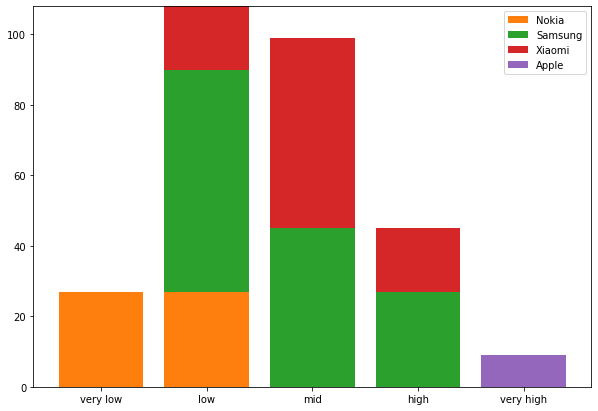

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

price_categories = data.groupby('price_category').size().index
plt.bar(price_categories, data.groupby('price_category').size())

sub_nokia = data[data['title'].str.contains('نوکیا')]
nokia_counts = sub_nokia.groupby('price_category').size()
plt.bar(price_categories, nokia_counts, label='Nokia')

sub_samsung = data[data['title'].str.contains('سامسونگ')]
samsung_counts = sub_samsung.groupby('price_category').size()
plt.bar(price_categories, samsung_counts, bottom=nokia_counts, label='Samsung')

sub_xiaomi = data[data['title'].str.contains('شیائومی')]
xiaomi_counts = sub_xiaomi.groupby('price_category').size()
plt.bar(price_categories, xiaomi_counts, bottom=nokia_counts+samsung_counts, label='Xiaomi')

sub_apple = data[data['title'].str.contains('اپل')]
apple_counts = sub_apple.groupby('price_category').size()
plt.bar(price_categories, apple_counts, bottom=nokia_counts+samsung_counts+xiaomi_counts, label='Apple')

plt.legend()
plt.show()

<hr />

💭 plot `Side-by-Side Boxplot` for price of phones with hard disk capacity of `64, 128 and 256`. (Your table should look like the one provided in the output cell)

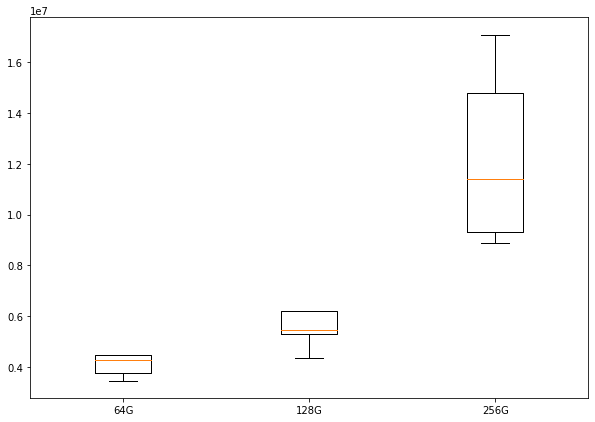

In [42]:
m64 = data['hard disk']==64
m128 = data['hard disk']==128
m256 = data['hard disk']==256

plt.figure(figsize=(10,7))

plt.boxplot(
    [data[m64]['price'], data[m128]['price'], data[m256]['price']],
    labels=['64G', '128G', '256G'], showfliers=False)
plt.show()

<hr />
<hr />

<span style="color:green">
    
- Get crawling! but always treat the data & its owners with respect. There are a number of online articles about ethics of crawling. Check them out if you are interested. :)  
    
- Also learning Selenium and Spyder libraries is recommended if you're interested in advanced crawling!

</span>


<hr />
<hr />

# Good Luck 😉

# More on crawling:
- An awesome free Persian <b><a  href=https://programming.tosinso.com/fa/videos/8506/%D8%AF%D9%88%D8%B1%D9%87-%D8%A2%D9%85%D9%88%D8%B2%D8%B4%DB%8C-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-Web-Scraping-%D8%A8%D8%A7-%D8%B2%D8%A8%D8%A7%D9%86-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86 > course</a></b>. 